<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_Unsupervised_Learning_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept

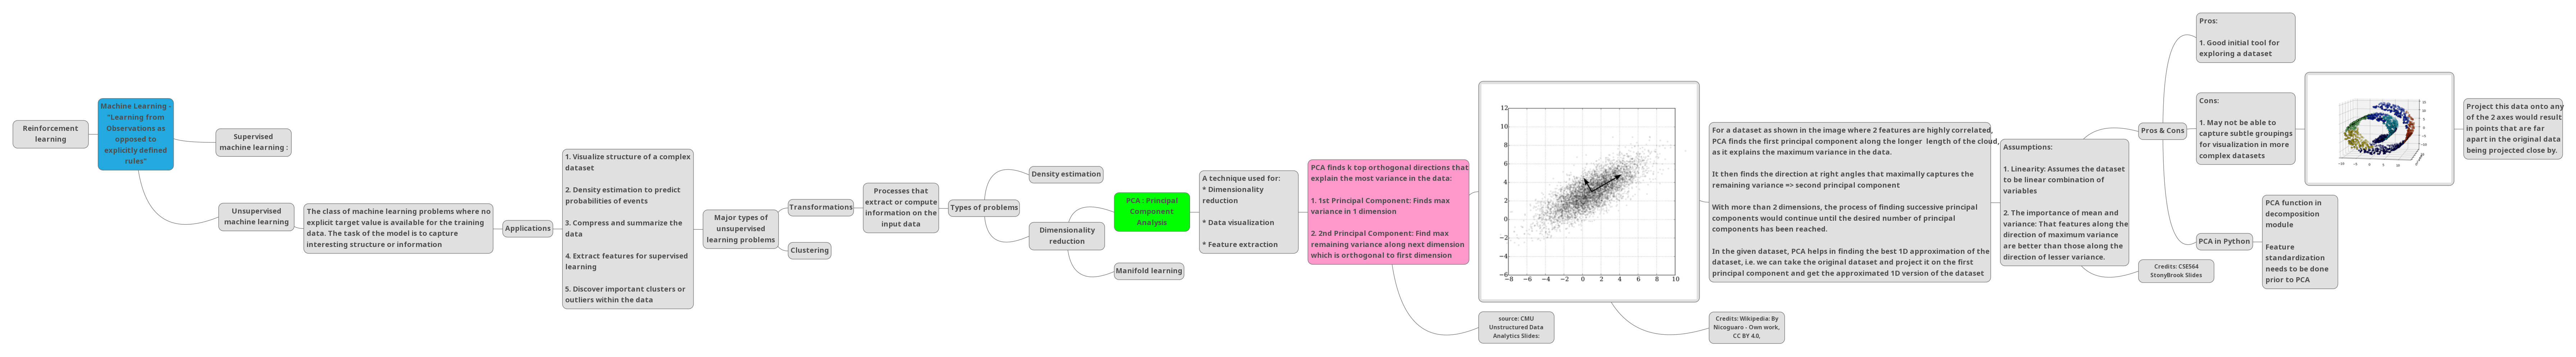

* Great visual explanation of the concept at https://setosa.io/ev/principal-component-analysis/

* Great conceptual understanding in the slides: http://www.andrew.cmu.edu/user/georgech/95-865/Lectures/Lecture%20-%2003_essence.pdf



## Setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer,make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!cp '/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/fruit_data_with_colors.txt' .

## Case studies

### PCA

#### UK Foods

Reference: https://bioboot.github.io/bggn213_f17/class-material/UK_food_pca/

In [5]:
UKFoods = pd.read_csv('https://bioboot.github.io/bggn213_f17/class-material/UK_foods.csv')

In [6]:
UKFoods.head()

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [7]:
UKFoods

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


In [8]:
UKFoods.rename({'Unnamed: 0' : 'FoodItem'},axis=1,inplace=True)

In [9]:
UKFoods.rename({'N.Ireland' : 'NIreland'},axis=1,inplace=True)

* New function: rename

In [10]:
UKFoods.columns

Index(['FoodItem', 'England', 'Wales', 'Scotland', 'NIreland'], dtype='object')

Text(0.5, 1.0, 'UK Food consumption data')

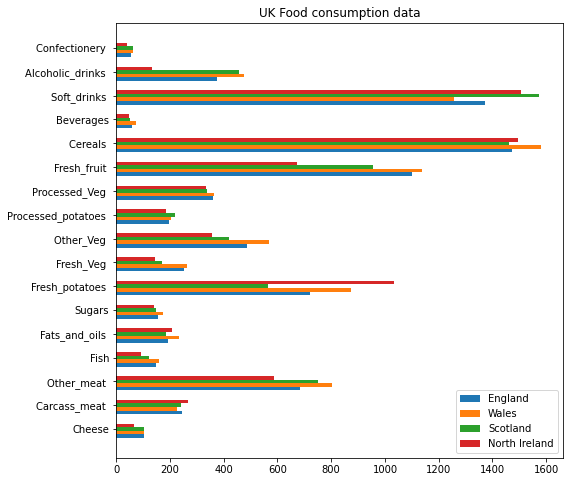

In [12]:

fig,axs = plt.subplots(figsize=(8,8))
barheight = 0.15

xaxis = np.arange(len(UKFoods.FoodItem))
axs.barh(xaxis,
        width = UKFoods.England,
        height=barheight,
        label = 'England'
        )
xaxis2 = xaxis+barheight
axs.barh(xaxis2,
        width = UKFoods.Wales,
        height=barheight,
        label='Wales'
        )
xaxis3 = xaxis2+barheight
axs.barh(xaxis3,
        width = UKFoods.Scotland,
        height=barheight,
        label='Scotland' 
        )
xaxis4 = xaxis3+barheight
axs.barh(xaxis4,
        width = UKFoods.NIreland,
        height=barheight,
        label='North Ireland'
        )
axs.set(yticks = xaxis + 2*barheight,yticklabels = UKFoods.FoodItem)

plt.legend()
plt.title('UK Food consumption data')
# plt.set_yticklabels()

* New function learnt: 
Horizontal bar plot in matplotlib

* Was a good help for plotting the above plot: https://stackoverflow.com/questions/15201386/how-to-plot-multiple-horizontal-bars-in-one-chart-with-matplotlib

To be able to make hopefully some better sense out of the categories of data, we run PCA on the data.

In [13]:
pca = PCA(n_components=2,random_state=0)

In [14]:
scaler = StandardScaler()

In [15]:
X_Food = scaler.fit_transform(UKFoods.drop(['FoodItem'],axis=1))

In [29]:
# X_Food.transpose()

In [17]:
UKFoodsPCA = pca.fit_transform(X_Food.transpose())

In [18]:
UKFoodsPCA

array([[-0.32625564, -0.04899856],
       [-0.39856563, -0.49608234],
       [-0.26603015,  0.59973958],
       [ 0.99085141, -0.05465867]])

Text(0, 0.5, 'Principal Component 2')

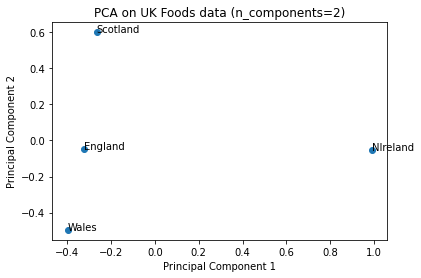

In [31]:
fig,ax = plt.subplots()
ax.scatter(UKFoodsPCA[:,0],UKFoodsPCA[:,1])

n = list(UKFoods.columns[1:])
for i, txt in enumerate(n):
    ax.annotate(txt, (UKFoodsPCA[i,0], UKFoodsPCA[i,1]))

ax.set_title('PCA on UK Foods data (n_components=2)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

* New function learnt: 
  * plt.annotate : to label scatter plots 

  (Was a good resource: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point) 

* Observations
  * We observe that Northern Ireland is already an outlier from the rest. 

  * When we check the data, we do find that Northern Ireland has significantly different numbers for a bunch of categories than the rest of the countries. 

In [68]:
pca = PCA(n_components=2,random_state=0)

In [69]:
pca = pca.fit(X_Food.transpose())

In [70]:
UKFoodsPCA.explained_variance_ratio_

array([0.66007679, 0.30611964])

In [71]:
sum(UKFoodsPCA.explained_variance_ratio_)

0.9661964276543376

In [72]:
UKFoodsPCAcomp = pca.transform(X_Food.transpose())

* Plot Principal components Vs Features

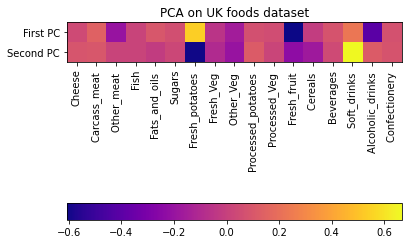

In [89]:
plt.imshow(pca.components_,cmap='plasma')
plt.title('PCA on UK foods dataset')
plt.gca().set_xticks(np.arange(len(UKFoods.FoodItem)))
plt.gca().set_yticks(np.arange(2))
plt.gca().set_xticklabels(list(UKFoods.FoodItem),rotation=90)
plt.gca().set_yticklabels(['First PC','Second PC'])

plt.colorbar(orientation = 'horizontal',pad=0.65)


#### Breast Cancer Dataset

In [90]:
CancerData = load_breast_cancer()

In [91]:
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

* Centering and scaling each feature before applying PCA

In [92]:
scaler = StandardScaler()

In [93]:
X_cancer_scaled = scaler.fit_transform(X_cancer)

In [94]:
pca = PCA(n_components=2).fit(X_cancer_scaled)

In [95]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [96]:
sum(pca.explained_variance_ratio_)

0.6324320765155935

In [97]:
CancerPCA = pca.transform(X_cancer_scaled)

In [98]:
print(X_cancer_scaled.shape,CancerPCA.shape)

(569, 30) (569, 2)


* Plotting the principal components

Text(0.5, 1.0, 'PCA (2 principal components) on Breast Cancer Dataset')

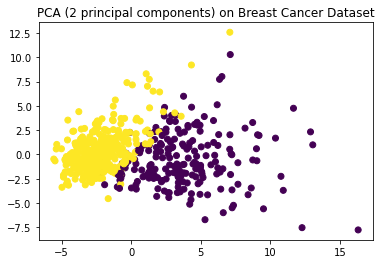

In [99]:
plt.scatter(CancerPCA[:,0],CancerPCA[:,1],c=y_cancer)
# plt.legend()
plt.title('PCA (2 principal components) on Breast Cancer Dataset')

* Plotting the magnitude of each PCA component in each original feature

In [100]:
pca.components_.shape

(2, 30)

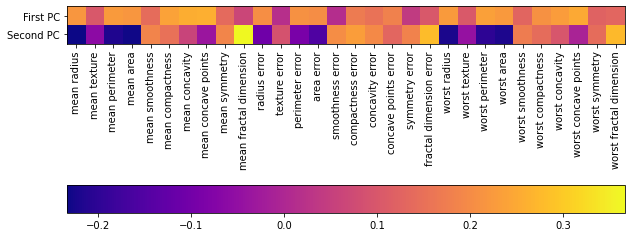

In [ ]:
plt.figure(figsize=(10,4))
plt.imshow(pca.components_,interpolation=None,cmap='plasma')

feature_names = list(CancerData.feature_names)
plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_yticks(np.arange(2))
plt.gca().set_xticklabels(feature_names,rotation=90)
plt.gca().set_yticklabels(['First PC','Second PC'])

plt.colorbar(orientation = 'horizontal',
             pad=0.65)

* new learning: 
  * gca() : get current axis
  * colorbar : 

#### Fruit dataset

In [101]:
FruitsData = pd.read_table('fruit_data_with_colors.txt')

In [102]:
FruitsData.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [103]:
fruitsfeatures = ['mass','width','height','color_score']

In [104]:
X_fruits = FruitsData[fruitsfeatures]

In [105]:
y_fruits = FruitsData['fruit_label']

In [106]:
scaler = StandardScaler()
X_fruits_scaled = scaler.fit_transform(X_fruits)

In [109]:
pca = PCA(n_components=2)

In [110]:
pca = pca.fit(X_fruits_scaled)

In [111]:
pca.explained_variance_ratio_

array([0.57845054, 0.25650171])

In [112]:
PCAFruits = pca.transform(X_fruits_scaled)

Text(0.5, 1.0, 'PCA (2 components) on fruits dataset')

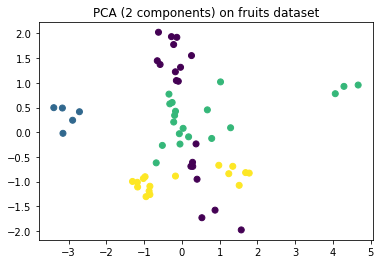

In [113]:
plt.scatter(PCAFruits[:,0],PCAFruits[:,1],c=y_fruits)
# plt.legend()
plt.title('PCA (2 components) on fruits dataset')

## References:
References:
1. Applied Data Science in Python Course - Coursera




